In [ ]:
# Install Ultralytics library
# !pip install ultralytics

   ---------------------------------------- 0.0/1.1 MB ? eta -:--:--
   ---------------------------------------- 1.1/1.1 MB 5.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/241.2 MB ? eta -:--:--
   ---------------------------------------- 1.3/241.2 MB 5.6 MB/s eta 0:00:43
   ---------------------------------------- 2.4/241.2 MB 5.8 MB/s eta 0:00:41
    --------------------------------------- 3.9/241.2 MB 6.0 MB/s eta 0:00:40
    --------------------------------------- 5.2/241.2 MB 6.1 MB/s eta 0:00:39
   - -------------------------------------- 6.3/241.2 MB 6.0 MB/s eta 0:00:39
   - -------------------------------------- 7.9/241.2 MB 6.2 MB/s eta 0:00:38
   - -------------------------------------- 9.2/241.2 MB 6.3 MB/s eta 0:00:38
   - -------------------------------------- 10.7/241.2 MB 6.3 MB/s eta 0:00:37
   - -------------------------------------- 11.8/241.2 MB 6.3 MB/s eta 0:00:37
   -- ------------------------------------- 13.1/241.2 MB 6.2 MB/s eta 0:00:37
 

In [10]:
# Disable warnings in the notebook to maintain clean output cells
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os, glob
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import yaml
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video

dataset loading

In [2]:
# Load a pretrained YOLOv8n model from Ultralytics
model = YOLO('yolov8n.pt')


image 1/1 e:\Hacktiv8\FP\P2FINAL_PROJECT\YoloModel\..\Vehicle_Detection_Image_Dataset\sample_image.jpg: 384x640 5 cars, 96.0ms
Speed: 3.4ms preprocess, 96.0ms inference, 2.8ms postprocess per image at shape (1, 3, 384, 640)


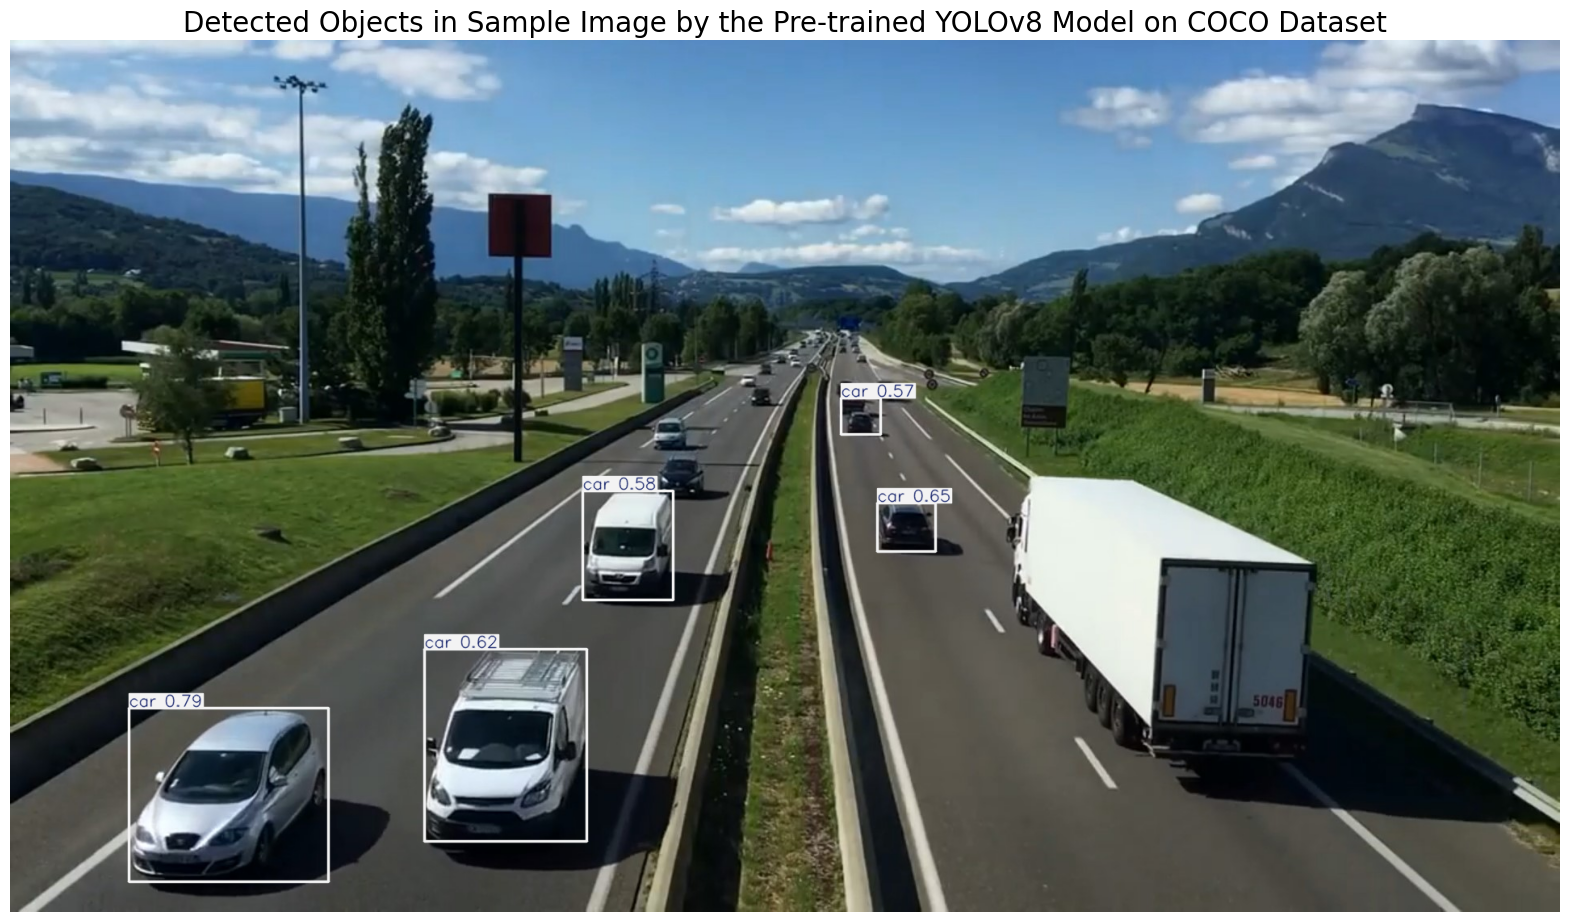

In [8]:
# Path to the image file
image_path = '../Vehicle_Detection_Image_Dataset/sample_image.jpg'
dataset_path = '../Vehicle_Detection_Image_Dataset'

# Perform inference on the provided image(s)
results = model.predict(source=image_path, 
                        imgsz=640,  # Resize image to 640x640 (the size pf images the model was trained on)
                        conf=0.5)   # Confidence threshold: 50% (only detections above 50% confidence will be considered)

# Annotate and convert image to numpy array
sample_image = results[0].plot(line_width=2)

# Convert the color of the image from BGR to RGB for correct color representation in matplotlib
sample_image = cv2.cvtColor(sample_image, cv2.COLOR_BGR2RGB)

# Display annotated image
plt.figure(figsize=(20,15))
plt.imshow(sample_image)
plt.title('Detected Objects in Sample Image by the Pre-trained YOLOv8 Model on COCO Dataset', fontsize=20)
plt.axis('off')
plt.show()

# Exploratory Data Analysis (EDA)

## 1. Analisis Jumlah dan Ukuran Gambar Dataset

In [9]:
# Set paths for training and validation image sets
train_images_path = os.path.join(dataset_path, 'train', 'images')
valid_images_path = os.path.join(dataset_path, 'valid', 'images')

# Initialize counters for the number of images
num_train_images = 0
num_valid_images = 0

# Initialize sets to hold the unique sizes of images
train_image_sizes = set()
valid_image_sizes = set()

# Check train images sizes and count
for filename in os.listdir(train_images_path):
    if filename.endswith('.jpg'):  
        num_train_images += 1
        image_path = os.path.join(train_images_path, filename)
        with Image.open(image_path) as img:
            train_image_sizes.add(img.size)

# Check validation images sizes and count
for filename in os.listdir(valid_images_path):
    if filename.endswith('.jpg'): 
        num_valid_images += 1
        image_path = os.path.join(valid_images_path, filename)
        with Image.open(image_path) as img:
            valid_image_sizes.add(img.size)

# Print the results
print(f"Number of training images: {num_train_images}")
print(f"Number of validation images: {num_valid_images}")

# Check if all images in training set have the same size
if len(train_image_sizes) == 1:
    print(f"All training images have the same size: {train_image_sizes.pop()}")
else:
    print("Training images have varying sizes.")

# Check if all images in validation set have the same size
if len(valid_image_sizes) == 1:
    print(f"All validation images have the same size: {valid_image_sizes.pop()}")
else:
    print("Validation images have varying sizes.")

Number of training images: 536
Number of validation images: 90
All training images have the same size: (640, 640)
All validation images have the same size: (640, 640)


Berdasarkan hasil eksekusi kode, diperoleh informasi sebagai berikut:

- Jumlah total gambar pada training set adalah 536 images.

- Jumlah total gambar pada validation set adalah 90 images.

- Semua gambar pada training set memiliki ukuran yang sama, yaitu 640 × 640 piksel.

- Semua gambar pada validation set juga memiliki ukuran yang sama, yaitu 640 × 640 piksel.

Dengan demikian, seluruh gambar pada dataset memiliki resolusi yang seragam antara data train dan validasi. Tidak ditemukan perbedaan ukuran gambar ataupun format yang tidak konsisten

---

Dari hasil EDA ini dapat disimpulkan bahwa:

- Dataset sudah terstruktur dengan baik antara bagian train dan valid, masing-masing berada dalam folder terpisah.

- Seluruh gambar memiliki ukuran yang seragam (640×640), sehingga dapat digunakan langsung untuk proses pelatihan model tanpa perlu dilakukan penyesuaian ukuran terlebih dahulu.

- Proporsi jumlah data antara train dan valid menunjukkan bahwa dataset sudah dibagi dengan porsi yang wajar untuk proses pelatihan dan validasi model deteksi objek.

## 2. Distribusi Jumlah Kendaraan per Gambar

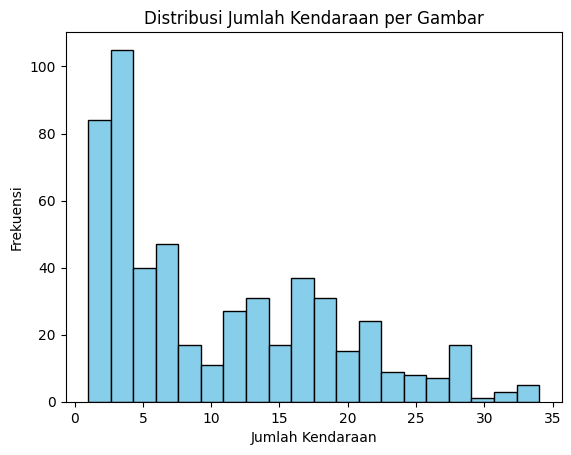

Rata-rata kendaraan per gambar: 10.48
Gambar dengan kendaraan terbanyak: 34


In [ ]:
label_dir = os.path.join(dataset_path, 'train', 'labels')
traffic_density = []

for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file)) as f:
        count = len(f.readlines())
        traffic_density.append(count)

plt.hist(traffic_density, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribusi Jumlah Kendaraan per Gambar")
plt.xlabel("Jumlah Kendaraan")
plt.ylabel("Frekuensi")
plt.show()

print(f"Rata-rata kendaraan per gambar: {sum(traffic_density)/len(traffic_density):.2f}")
print(f"Gambar dengan kendaraan terbanyak: {max(traffic_density)}")

Berdasarkan histogram di atas, terlihat bahwa sebagian besar gambar dalam dataset hanya berisi sedikit kendaraan, umumnya antara 1 hingga 5 kendaraan per gambar. Hal ini menunjukkan bahwa mayoritas data merepresentasikan kondisi lalu lintas yang relatif lancar atau normal.

Frekuensi mulai menurun secara signifikan ketika jumlah kendaraan meningkat. Gambar dengan lebih dari 10 kendaraan jumlahnya jauh lebih sedikit, dan hanya segelintir gambar yang menampilkan lebih dari 20 kendaraan. Kondisi seperti ini bisa diartikan sebagai situasi lalu lintas padat atau kemacetan lokal, namun jumlahnya terbatas.

Puncak distribusi (mode) berada pada rentang jumlah kendaraan yang rendah, menandakan bahwa dataset cenderung tidak seimbang terhadap kondisi macet — sebagian besar frame menggambarkan situasi normal, sedangkan hanya sebagian kecil yang menampilkan kepadatan tinggi.

Secara keseluruhan, visualisasi ini menunjukkan bahwa dataset memiliki keragaman tingkat kepadatan lalu lintas, mulai dari jalanan kosong hingga padat, dengan rata-rata sekitar 10 kendaraan per gambar. Pola ini cukup ideal untuk melatih model deteksi karena mencakup berbagai variasi kondisi lalu lintas, meskipun proporsi gambar dengan kepadatan tinggi masih relatif sedikit.

## 3. Estimasi Traffic Category (Low, Medium, High)

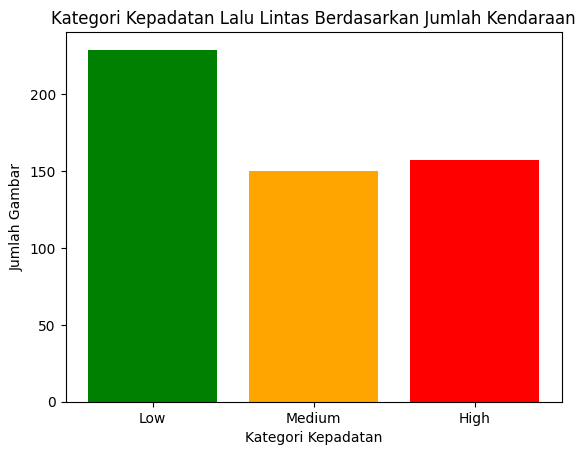

In [19]:
low = sum(1 for x in traffic_density if x <= 5)
medium = sum(1 for x in traffic_density if 6 <= x <= 15)
high = sum(1 for x in traffic_density if x > 15)

plt.bar(['Low', 'Medium', 'High'], [low, medium, high], color=['green', 'orange', 'red'])
plt.title("Kategori Kepadatan Lalu Lintas Berdasarkan Jumlah Kendaraan")
plt.xlabel("Kategori Kepadatan")
plt.ylabel("Jumlah Gambar")
plt.show()

Berdasarkan hasil visualisasi di atas:

- Kategori “Low” (≤5 kendaraan) memiliki jumlah gambar paling banyak.

Artinya sebagian besar data menggambarkan lalu lintas yang lancar atau normal, dengan sedikit kendaraan di frame.

- Kategori “Medium” (6–15 kendaraan) memiliki jumlah gambar yang lebih sedikit dibanding kategori “Low”.

Ini merepresentasikan lalu lintas agak ramai, tetapi belum sampai padat.

- Kategori “High” (>15 kendaraan) juga cukup banyak, hampir seimbang dengan kategori “Medium”.

Hal ini menunjukkan dataset juga mencakup kondisi padat, di mana banyak kendaraan muncul secara bersamaan dalam satu frame.

## 4. Heatmap Posisi Kendaraan

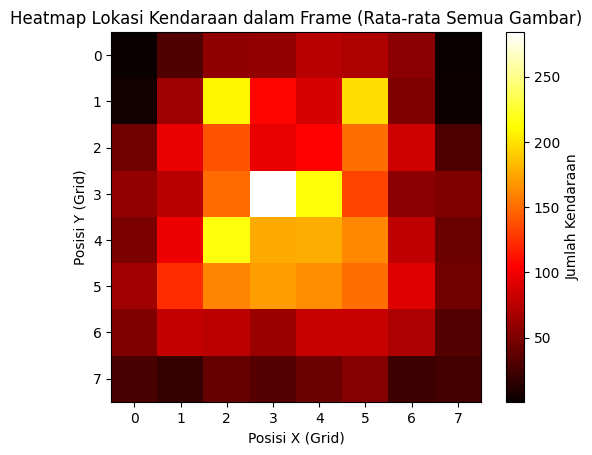

In [17]:
grid_h, grid_w = 8, 8  # bagi gambar jadi 8x8 grid
heatmap = np.zeros((grid_h, grid_w))

for label_file in os.listdir(label_dir):
    with open(os.path.join(label_dir, label_file)) as f:
        for line in f:
            _, x, y, _, _ = map(float, line.split())
            xi = min(int(x * grid_w), grid_w - 1)
            yi = min(int(y * grid_h), grid_h - 1)
            heatmap[yi, xi] += 1

plt.imshow(heatmap, cmap='hot', interpolation='nearest')
plt.colorbar(label="Jumlah Kendaraan")
plt.title("Heatmap Lokasi Kendaraan dalam Frame (Rata-rata Semua Gambar)")
plt.xlabel("Posisi X (Grid)")
plt.ylabel("Posisi Y (Grid)")
plt.show()

Dari hasil heatmap di atas, terlihat bahwa area tengah gambar memiliki intensitas warna paling terang — menunjukkan area tersebut merupakan zona dengan konsentrasi kendaraan tertinggi.

Artinya, sebagian besar kendaraan dalam dataset terletak di bagian tengah frame, yang secara visual bisa diartikan sebagai jalur utama lalu lintas yang ditangkap kamera.
Bagian pinggir gambar (tepi kiri, kanan, dan bawah) memiliki warna lebih gelap, menandakan area tersebut jarang dilewati kendaraan atau hanya menampilkan sedikit objek.

Pola ini umum terjadi pada pengambilan gambar top-view (dari atas jalan), di mana kamera fokus pada lajur utama kendaraan.
Hal ini memperkuat bahwa dataset sudah cukup representatif untuk menganalisis pergerakan dan kepadatan lalu lintas pada area tengah jalan.

---

- Zona berwarna kuning/putih : titik dengan kepadatan kendaraan paling tinggi.

- Zona merah/oranye : intensitas sedang, menunjukkan kendaraan lewat tapi tidak seramai area tengah.

- Zona gelap : area jarang dilewati kendaraan, kemungkinan merupakan bahu jalan, trotoar, atau bagian di luar jalur utama.